In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

Embedding idea for 3-regular trees:

Let $T = (V,E)$ with $r \in V$ an arbitrary node. For any node $r \neq v \in V$, let $p(v)$ be the parent of $v$, $d_1(v)$ be the first daughter of $v$, and $d_2(v)$ be the second daughter of $v$. Let $r_1,r_2,$ and $r_3$ be the daughters of $r$.

Let $E: V \rightarrow \mathbb{R}^2$ be the embedding function for each vertex. This is calculated locally with the base case of $E(r) = (0,0)$, $E(r_1) = (0,1)$, $E(r_2) = (\sin \theta, \cos \theta)$, and $E(r_2) = (\sin (2\theta), \cos(2\theta))$ where $\theta = \frac{2\pi}{3}$. If $\gamma \in (0,1)$, we have

$$
E(d_1(v)) = \begin{bmatrix}\gamma^d \cos\left(\frac{\theta}{2} + \theta_v\right) \\ \gamma^d \sin\left(\frac{\theta}{2} + \theta_v\right) \end{bmatrix} + \vec{v}
$$

where $\theta_v = \text{atan}\left(\frac{v_y}{v_x}\right)$ and $v = (v_x,v_y)$. For the second daughter:

$$
E(d_2(v)) = \begin{bmatrix}\gamma^d \cos\left(-\frac{\theta}{2} + \theta_v\right) \\ \gamma^d \sin\left(-\frac{\theta}{2} + \theta_v\right) \end{bmatrix} + \vec{v}.
$$

These are essentially rotations by the standard left/right daughter amounts followed by the parent rotation, then translated to be relative to the parent's location.

In [119]:
'''
approximate mod operation for floats
'''
def floatmod(a:float,n:float):
    return a - (a//n)*n

In [189]:
'''
build a d-regular tree (except leaves) as an nx graph
'''
def d_reg_tree(d,depth=4,embed=False,embed_gamma=0.5):
    assert(d > 1)#1-regular trees don't exist
    t = nx.Graph()
    t.add_node('r')#root
    E = {}
    E.update({'r':np.array([0,0])})
    if depth == 0:
        if embed:
            return t,E
        return t
    droot = ['r_{}'.format(i) for i in range(d)]#daughters-of-root
    t.add_nodes_from(droot)
    t.add_edges_from([('r',d) for d in droot])
    theta = 2*np.pi/d
    tho2 = theta/2
    E.update({x:np.array([np.cos(theta*i),np.sin(theta*i)]) for i,x in enumerate(droot)})
    thps = {d:(np.arctan(E[d][1]/E[d][0]) if E[d][0] >= 0 else np.pi-(np.arctan(E[d][1]/E[d][0]))) if E[d][1] != 0 else 0 for d in droot}
    q = [(x,1) for x in droot]
    #do a dfs traversal to build the tree, limited in depth
    node_idx = 1#index the other nodes separately
    while len(q) > 0:
        current,node_depth = q.pop(-1)
        if node_depth >= depth:#depth=1 should mean the leaves are depth 1
            continue
        
        ndd = node_depth+1
        
        thp = thps[current]
        vp =  E[current] / np.linalg.norm(E[current])#unit vector in parent direction
        ins_idx = 0
        for i in range(d):
            angle = 2*i*theta + tho2 + thp
            dt = node_idx + i + 1
            node_idx += 1
            norm = embed_gamma**(ndd-1)
            xc = np.cos(angle)
            yc = np.sin(angle)
            v = np.array([xc,yc])*norm
            dp = (v / np.linalg.norm(v)) @ vp
            if np.isclose(dp,1) or np.isclose(dp,-1):#parallel or antiparallel
                continue#this is our parent, not one of our daughters
            E.update({dt:v + E[current]})
            t.add_edge(current,dt)
            q.append((dt,ndd))
            thps.update({dt:angle})
        
    if embed:
        return t,E
    return t

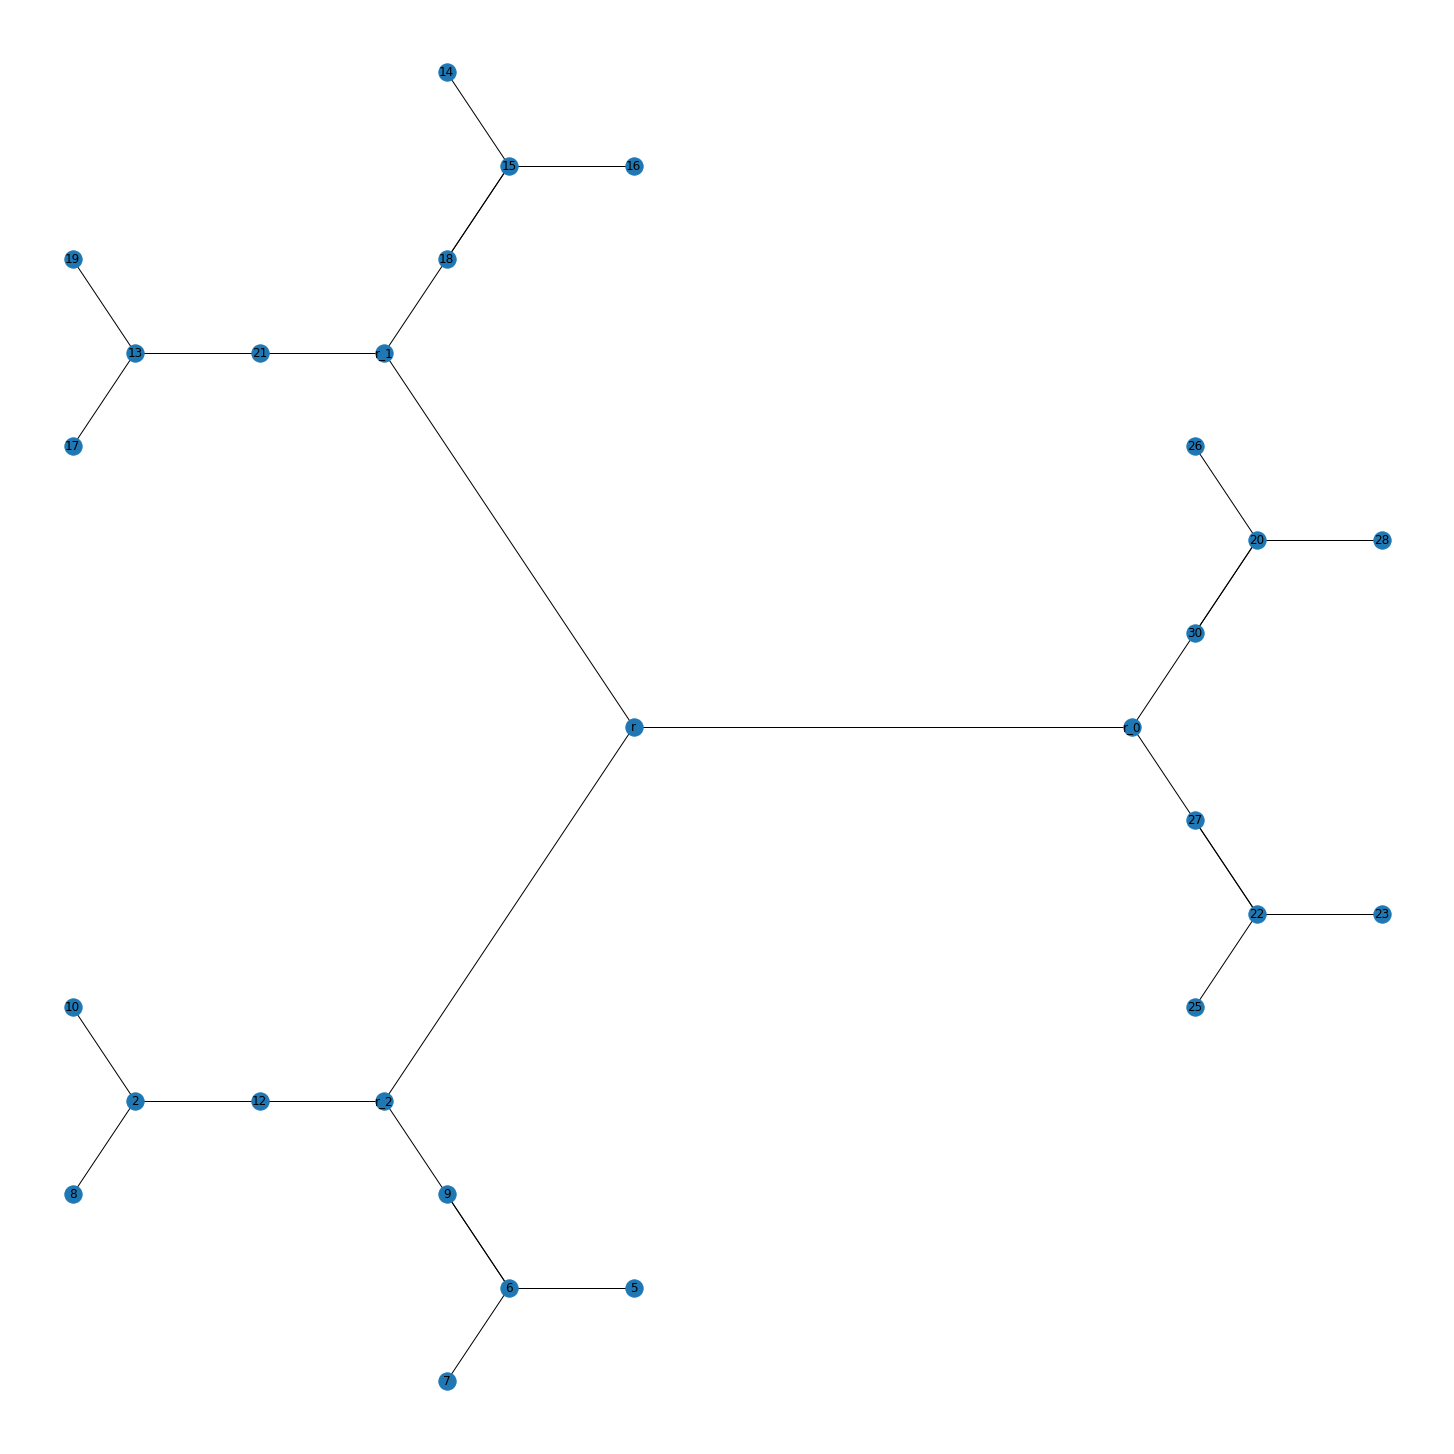

In [191]:
T,E = d_reg_tree(3,depth=3,embed=True)
plt.figure(figsize=(20,20))
nx.draw(T,pos=E,with_labels=True)

It's not correct in terms of what I want yet but I can already see how this will fail ($s = 17, t = 10$). All that's wrong here are those intermediate depth-2 nodes.

In [192]:
E

{'r': array([0, 0]),
 'r_0': array([1., 0.]),
 'r_1': array([-0.5      ,  0.8660254]),
 'r_2': array([-0.5      , -0.8660254]),
 2: array([-1.       , -0.8660254]),
 6: array([-0.25      , -1.29903811]),
 5: array([-1.11022302e-16, -1.29903811e+00]),
 7: array([-0.375     , -1.51554446]),
 9: array([-0.375     , -1.08253175]),
 8: array([-1.125     , -1.08253175]),
 10: array([-1.125     , -0.64951905]),
 12: array([-0.75     , -0.8660254]),
 13: array([-1.       ,  0.8660254]),
 15: array([-0.25      ,  1.29903811]),
 14: array([-0.375     ,  1.51554446]),
 16: array([1.94289029e-16, 1.29903811e+00]),
 18: array([-0.375     ,  1.08253175]),
 17: array([-1.125     ,  0.64951905]),
 19: array([-1.125     ,  1.08253175]),
 21: array([-0.75     ,  0.8660254]),
 20: array([1.25     , 0.4330127]),
 22: array([ 1.25     , -0.4330127]),
 23: array([ 1.5      , -0.4330127]),
 25: array([ 1.125     , -0.64951905]),
 27: array([ 1.125     , -0.21650635]),
 26: array([1.125     , 0.64951905]),
 2